In [1]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [2]:
batch_size = 2048

In [3]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=8)

img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Reconstructed images


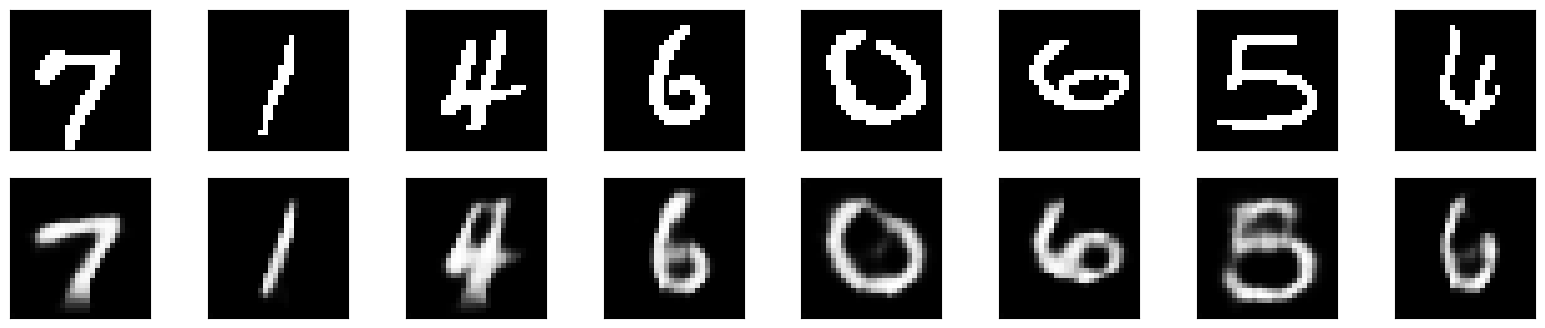

Generated images


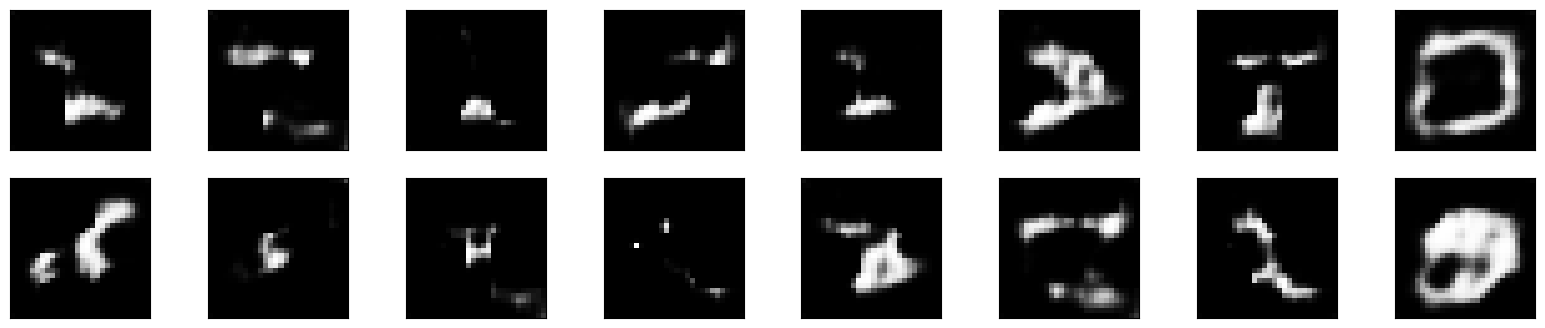

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


In [4]:
AE = load_model('models/AE_MONO_BINARY_MISSING.keras', custom_objects={'Autoencoder': Autoencoder})

reconstructed_imgs = AE.predict(imgTest)
generated_imgs1 = AE.generate_images()
generated_imgs2 = AE.generate_images()
print("Reconstructed images")
plot_comparisons(imgTest, reconstructed_imgs)
print("Generated images")
plot_comparisons(generated_imgs1, generated_imgs2)

img_AE_reconstructed = AE.predict(img)
img_AE_generated = AE.generate_images(batch_size)

c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MultivariateNormalTriL.new(t, event_size, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]
c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: IndependentBernoulli.new(  # pylint: disable=g-long-lambda
            t, event_shape, sample

Reconstructed images


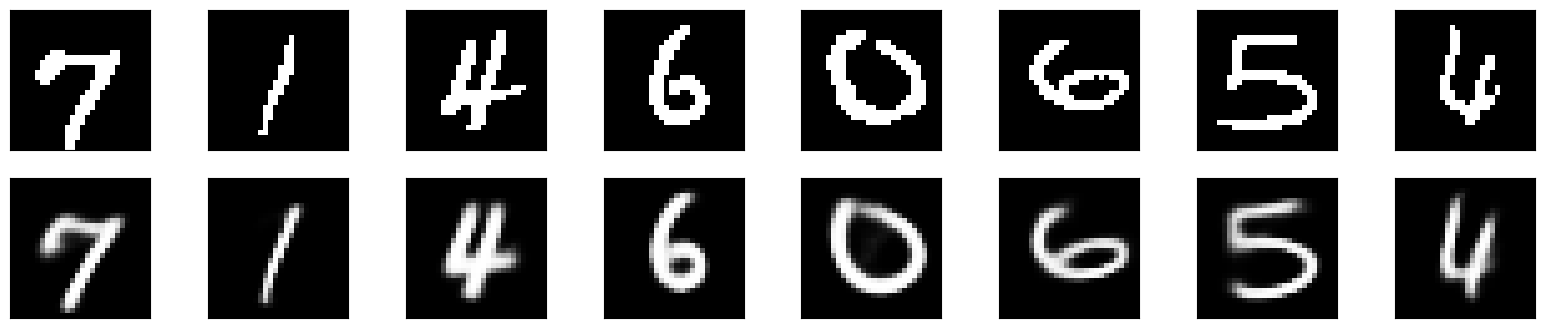

Generated images


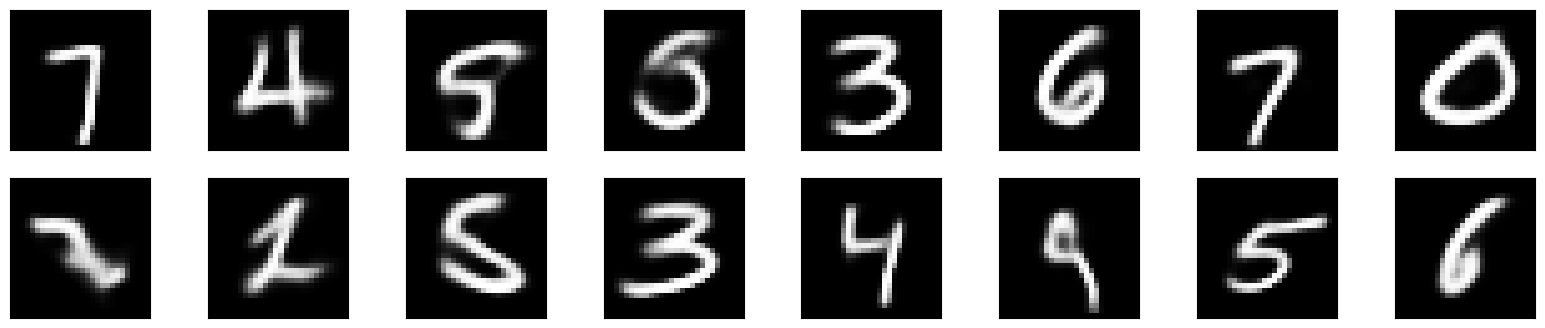

In [5]:
VAE = VariationalAutoencoder()
VAE.load_weights('models/variational_autoencoder.keras')

reconstructed_imgs = VAE.predict(imgTest)
generated_imgs1 = VAE.generate_images()
generated_imgs2 = VAE.generate_images()
print("Reconstructed images")
imgTest.shape
plot_comparisons(imgTest, reconstructed_imgs)
print("Generated images")
plot_comparisons(generated_imgs1, generated_imgs2)

img_VAE_reconstructed = VAE.predict(img)
img_VAE_generated = VAE.generate_images(batch_size)

In [6]:
net = VerificationNet(file_name = "C:/Projects/public/DL_Autoencoders/models/net_MONO_BINARY_MISSING.weights.h5")
net.load_weights()

print(f'img.shape: {img.shape}')
print(f'label.shape: {labels.shape}')

cov = net.check_class_coverage(data=img, tolerance=0.98)
pred, acc = net.check_predictability(data=img, correct_labels=labels)
print(f"Original images Coverage: {100*cov:.2f}%")
print(f"Original images Predictability: {100*pred:.2f}%")
print(f"Original images Accuracy: {100 * acc:.2f}%")


cov = net.check_class_coverage(data=img_AE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_AE_reconstructed, correct_labels=labels)
print(f"AE reconstructed Coverage: {100*cov:.2f}%")
print(f"AE reconstructed Predictability: {100*pred:.2f}%")
print(f"AE reconstructed Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_AE_generated, tolerance=0.98)
print(f"AE generated Coverage: {100*cov:.2f}%")

cov = net.check_class_coverage(data=img_VAE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_VAE_reconstructed, correct_labels=labels)
print(f"VAE reconstructed Coverage: {100*cov:.2f}%")
print(f"VAE reconstructed Predictability: {100*pred:.2f}%")
print(f"VAE reconstructed Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_VAE_generated, tolerance=0.98)
print(f"VAE generated Coverage: {100*cov:.2f}%")

c:\Projects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Projects\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


img.shape: (2048, 28, 28, 1)
label.shape: (2048,)
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Original images Coverage: 90.00%
Original images Predictability: 88.77%
Original images Accuracy: 85.45%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
AE reconstructed Coverage: 80.00%
AE reconstructed Predictability: 79.20%
AE reconstructed Accuracy: 71.48%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
AE generated Coverage: 50.00%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
VAE reconstructed Coverage: 90.00%
VAE reconstructed Predictability: 89.65%
VAE reconstructed Accuracy: 81.30%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
VAE generated Coverage: 90.00%


### AE Anomaly detection

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


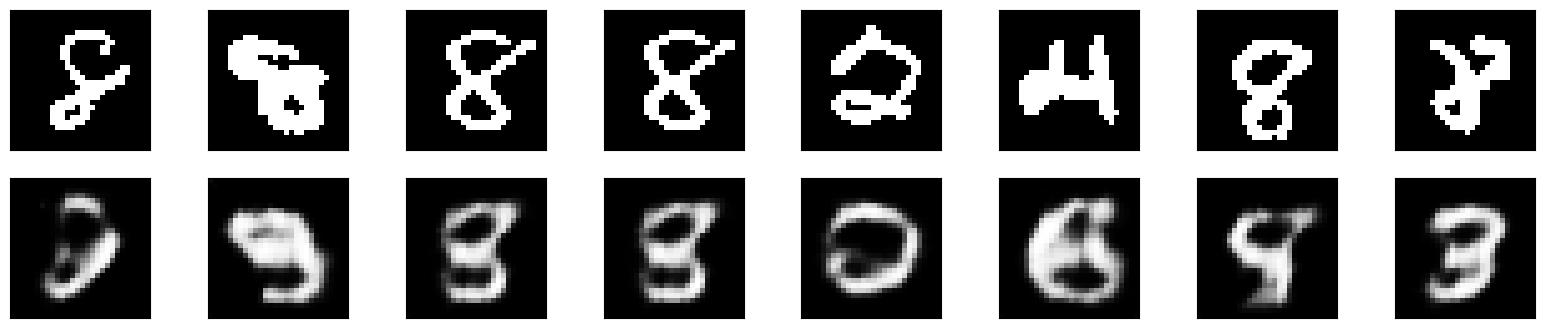

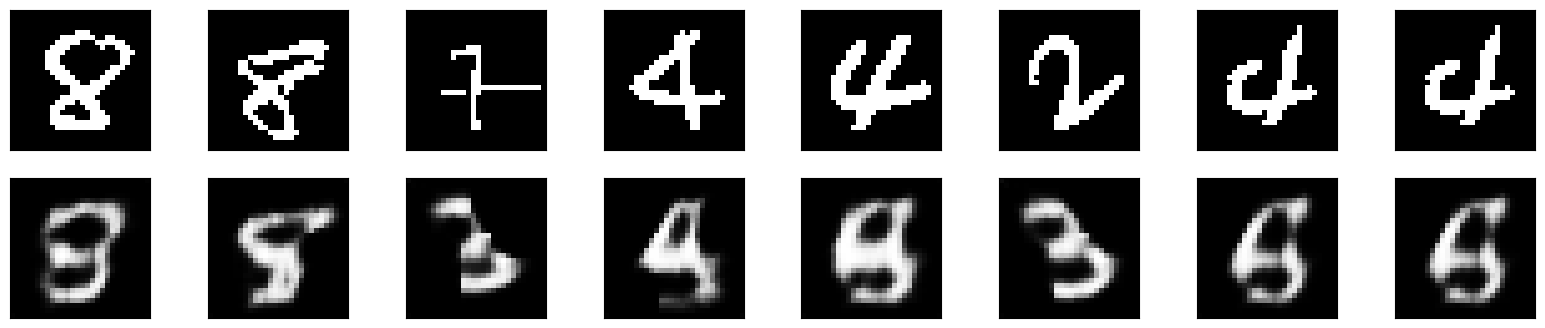

Top  losses: [0.29325384 0.29809707 0.29912743 0.29912743 0.30141369 0.30574313
 0.31714338 0.3195177  0.333467   0.33742595 0.34367412 0.35013592
 0.3679436  0.38366166 0.40699327 0.40699333]


In [7]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=9)
img, labels = gen.get_random_batch(training=False, batch_size=batch_size)

img_AE_reconstructed = AE.predict(img)
loss_img_AE_reconstructed = tf.keras.losses.binary_crossentropy(img, img_AE_reconstructed).numpy()
loss_img_AE_reconstructed = tf.reduce_mean(loss_img_AE_reconstructed, axis=[1, 2])
losses = np.array(loss_img_AE_reconstructed)
topIndexes = np.argsort(loss_img_AE_reconstructed)[-16:]
plot_comparisons(img[topIndexes[:8]], img_AE_reconstructed[topIndexes[:8]])
plot_comparisons(img[topIndexes[8:]], img_AE_reconstructed[topIndexes[8:]])
print(f"Top  losses: {losses[topIndexes]}")

### VAE Anomaly detection

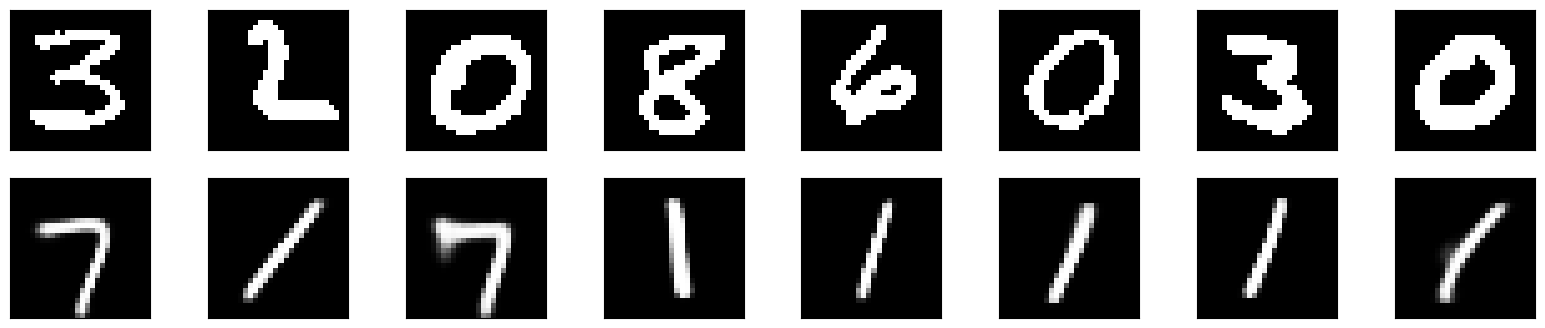

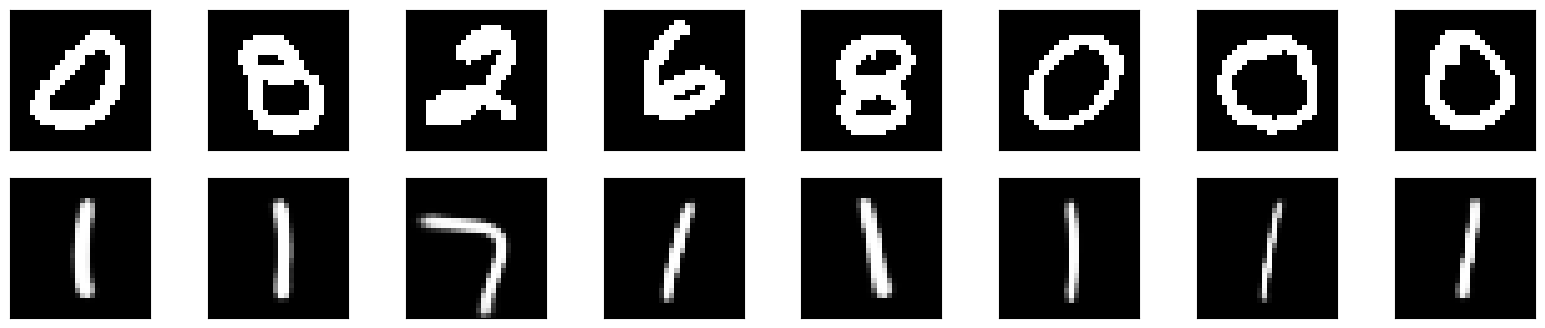

Top  losses: [2.133374  2.1658123 2.1903138 2.1921954 2.2035692 2.2640343 2.2683327
 2.2901814 2.3243742 2.358327  2.376364  2.3938785 2.4914112 2.5324566
 2.5582902 2.670653 ]


In [8]:
img_AE_reconstructed = VAE.predict(img)
loss_img_VAE_reconstructed = tf.keras.losses.binary_crossentropy(img, img_VAE_reconstructed).numpy()
loss_img_VAE_reconstructed = tf.reduce_mean(loss_img_VAE_reconstructed, axis=[1, 2])
losses = np.array(loss_img_VAE_reconstructed)
topIndexes = np.argsort(loss_img_VAE_reconstructed)[-16:]
plot_comparisons(img[topIndexes[:8]], img_VAE_reconstructed[topIndexes[:8]])
plot_comparisons(img[topIndexes[8:]], img_VAE_reconstructed[topIndexes[8:]])
print(f"Top  losses: {losses[topIndexes]}")